# Gradient descent for linear regression

In this notebook the process of finding optimal values for w and b will be automated.

In [15]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#use the same data as the previous notebooks
#x_training is the size of the house expressed in square meters; here acts as the input variable
#y_training is the price of the house expressed in euros 
#and is written as the product between the square meters size of the house and the average price for that neighborood of the city;
#here it acts as the output variable
x_training = np.array([45, 75, 100, 120, 150, 200])
y_training = np.array([45*2100, 75*2100, 100*2563, 120*1615, 150*2100, 200*2100])

In [17]:
#reuse the function defined earlier
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

Gradient descent is usually defined in this way: 
- repeat until convergence
- $w = w - \alpha\frac{\partial J(w,b)}{\partial w}$
- $b = b -\alpha\frac{\partial J(w,b)}{\partial b}$
with parameters w and b that are updated simultaneously. In this way the gradient is defined as:
- $\frac{\partial J(w,b)}{\partial w} = \frac{1}{m}\sum_{i}(f_{w,b}(x^{i})-y^{i})x^{i}$
- $\frac{\partial J(w,b)}{\partial b} = \frac{1}{m}\sum_{i}(f_{w,b}(x^{i})-y^{i})$
and simultaneously here means that the derivatives are calculated for all the parameters before updating any of the parameters.

We will define other two functions in order to implement gradient descent for one feature:
- compute gradient
- gradient descent

In [18]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [19]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [25]:

# initialize parameters
w_init = 0
b_init = 0
# scaling x values since in this way we can improve convergence by making the algorithm stable. I prefered scaling x values so
#that the prediction remains in units are interpretable
x_mean = np.mean(x_training)
x_std = np.std(x_training)
x_scaled = (x_training - x_mean) / x_std

# keep y as is for now
tmp_alpha = 1.0e-2   # should now be safe
iterations = 10000

w_final, b_final, J_hist, p_hist = gradient_descent(
    x_scaled, y_training, 0, 0, tmp_alpha, iterations, compute_cost, compute_gradient
)
print(f"(w,b) found by gradient descent: ({w_final:.4f}, {b_final:.4f})")


Iteration    0: Cost 3.37e+10  dj_dw: -1.024e+05, dj_db: -2.395e+05   w:  1.024e+03, b: 2.39517e+03
Iteration 1000: Cost 4.54e+08  dj_dw: -4.422e+00, dj_db: -1.034e+01   w:  1.024e+05, b: 2.39506e+05
Iteration 2000: Cost 4.54e+08  dj_dw: -1.909e-04, dj_db: -4.464e-04   w:  1.024e+05, b: 2.39517e+05
Iteration 3000: Cost 4.54e+08  dj_dw: -8.261e-09, dj_db: -1.925e-08   w:  1.024e+05, b: 2.39517e+05
Iteration 4000: Cost 4.54e+08  dj_dw: -7.200e-10, dj_db: -1.436e-09   w:  1.024e+05, b: 2.39517e+05
Iteration 5000: Cost 4.54e+08  dj_dw: -7.200e-10, dj_db: -1.436e-09   w:  1.024e+05, b: 2.39517e+05
Iteration 6000: Cost 4.54e+08  dj_dw: -7.200e-10, dj_db: -1.436e-09   w:  1.024e+05, b: 2.39517e+05
Iteration 7000: Cost 4.54e+08  dj_dw: -7.200e-10, dj_db: -1.436e-09   w:  1.024e+05, b: 2.39517e+05
Iteration 8000: Cost 4.54e+08  dj_dw: -7.200e-10, dj_db: -1.436e-09   w:  1.024e+05, b: 2.39517e+05
Iteration 9000: Cost 4.54e+08  dj_dw: -7.200e-10, dj_db: -1.436e-09   w:  1.024e+05, b: 2.39517e+05


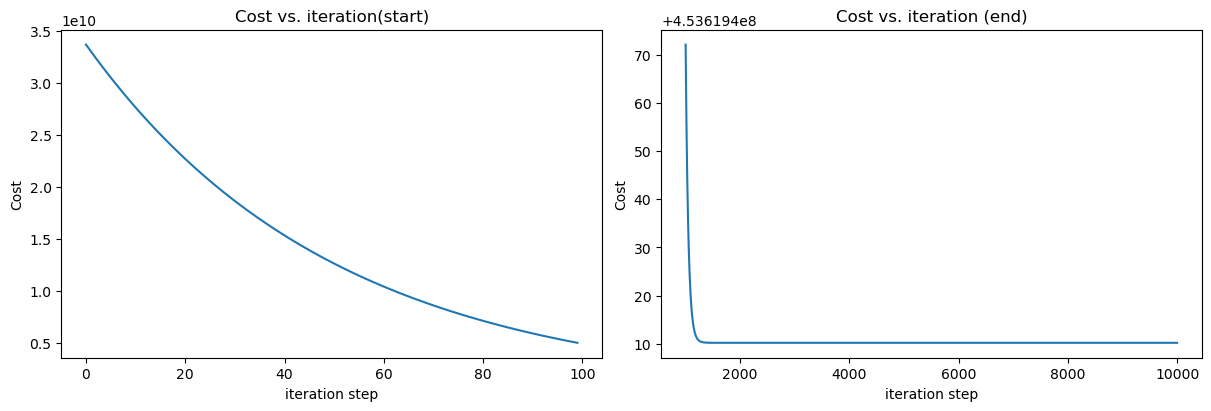

In [24]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

Another kind of attempt we could do is to set the learning rate at a higher value and see that happens with just some iterations

In [26]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_scaled ,y_training, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 1.81e+09  dj_dw: -1.024e+05, dj_db: -2.395e+05   w:  8.195e+04, b: 1.91613e+05
Iteration    1: Cost 5.08e+08  dj_dw: -2.049e+04, dj_db: -4.790e+04   w:  9.834e+04, b: 2.29936e+05
Iteration    2: Cost 4.56e+08  dj_dw: -4.097e+03, dj_db: -9.581e+03   w:  1.016e+05, b: 2.37601e+05
Iteration    3: Cost 4.54e+08  dj_dw: -8.195e+02, dj_db: -1.916e+03   w:  1.023e+05, b: 2.39133e+05
Iteration    4: Cost 4.54e+08  dj_dw: -1.639e+02, dj_db: -3.832e+02   w:  1.024e+05, b: 2.39440e+05
Iteration    5: Cost 4.54e+08  dj_dw: -3.278e+01, dj_db: -7.665e+01   w:  1.024e+05, b: 2.39501e+05
Iteration    6: Cost 4.54e+08  dj_dw: -6.556e+00, dj_db: -1.533e+01   w:  1.024e+05, b: 2.39514e+05
Iteration    7: Cost 4.54e+08  dj_dw: -1.311e+00, dj_db: -3.066e+00   w:  1.024e+05, b: 2.39516e+05
Iteration    8: Cost 4.54e+08  dj_dw: -2.622e-01, dj_db: -6.132e-01   w:  1.024e+05, b: 2.39517e+05
Iteration    9: Cost 4.54e+08  dj_dw: -5.245e-02, dj_db: -1.226e-01   w:  1.024e+05, b: 2.39517e+05
